# visualize_data

A notebook to make some quick plots of the seeclickfix data for New Haven

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nhrc2

In [2]:
%matplotlib inline

In [6]:
print(nhrc2.__file__)
nhrc2dir = '/'.join(str(nhrc2.__file__).split('/')[:-1])+'/'
print(nhrc2dir)

/Users/matt/projects/nhrc2/__init__.pyc
/Users/matt/projects/nhrc2/


In [8]:
scf_df = pd.read_csv(nhrc2dir+'data/scf_data_full.csv')

In [9]:
scf_df.head(5)

,Unnamed: 0,acknowledged_at,address,category,closed_at,created_at,id,issue_id,lat,lng,reporter_id,reporter_name,reporter_role,shortened_url,status,summary,updated_at
0,0,2015-03-30T16:03:33-04:00,"25 Elmer Street New Haven, Connecticut",SNOW RELATED,NaN,2015-03-29T17:18:53-04:00,1559551,8516,41.310373,-72.924160,0,CAROL SANTACROCE,Registered User,http://bit.ly/1HVR8D7,Acknowledged,SNOW RELATED,2015-03-30T16:03:33-04:00
1,1,NaN,"Lenox Street And Clifton Street New Haven, Co...",SNOW RELATED,NaN,2015-03-17T12:04:30-04:00,1536264,8516,41.309046,-72.884204,6774,Department of Public Works,Verified Official,http://bit.ly/19w8mbW,Open,Unshoveled Sidewalks,2015-03-17T12:04:30-04:00
2,2,NaN,"591 Whitney Avenue New Haven, Connecticut",SNOW RELATED,NaN,2015-03-16T17:17:58-04:00,1534432,8516,41.326617,-72.915233,0,An anonymous SeeClickFix user,Registered User,http://bit.ly/1GeXnOd,Open,SNOW RELATED,2015-03-16T17:17:58-04:00
3,3,2015-03-16T11:04:17-04:00,"900 Block Of State St New Haven, Connecticut",SNOW RELATED,NaN,2015-03-16T10:21:24-04:00,1533208,8516,41.314704,-72.911942,0,PamB,Registered User,http://bit.ly/1Ds46Xu,Acknowledged,SNOW RELATED,2015-03-16T15:36:34-04:00
4,4,NaN,"112-116 Court Street New Haven, Connecticut",SNOW RELATED,NaN,2015-03-16T08:34:55-04:00,1532841,8516,41.305827,-72.922153,0,An anonymous SeeClickFix user,Registered User,http://bit.ly/1BJ8azg,Open,SNOW RELATED,2015-03-16T08:58:48-04:00


(41.24, 41.355)

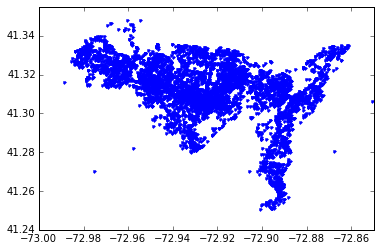

In [10]:
plt.plot(scf_df['lng'], scf_df['lat'], '.')
plt.xlim([-73.0, -72.85])
plt.ylim([41.24, 41.355])

In [35]:
issue_ints = scf_df['issue_id'].values

#now get right of the "other" ids:
issue_ints[np.where(issue_ints == 'other')[0]] = -1

new_ints = [int(i) for i in issue_ints]
scf_df['int_issue_id'] = new_ints

In [38]:
match_cats = scf_df.drop_duplicates(subset='issue_id')

In [39]:
match_cats[['issue_id', 'category']]

,issue_id,category
0,8516,SNOW RELATED
569,5743,Bins for Trash & Recycling
611,122,Graffiti
639,6215,Hangers
641,5185,Health Complaints
650,1250,Illegal Dumping
861,374,Other
1606,3018,Other - city responsibility
1871,372,Parking Meter
1881,121,Parking Violation/Abandoned Auto


In [27]:
print(len(match_cats['issue_id'].values))
match_cats['issue_id'].values


25


array(['8516', '5743', '122', '6215', '5185', '1250', '374', '3018', '372',
       '121', '126', '2626', '116', '1249', '1251', '117', '373', '124',
       '2625', '51', '1966', '1853', '5998', '4947', -1], dtype=object)

In [88]:
match_cats['num_issues'] = 0.

/Applications/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


12

In [94]:
total_issues = len(scf_df)
for cat in match_cats['category']:
    idx = np.where(match_cats['category'] == cat)[0][0]
    match_cats.loc[idx, 'num_issues'] = len(scf_df[scf_df['category'] == cat])


IndexError: index 0 is out of bounds for axis 0 with size 0

In [93]:
match_cats['num_issues']

0          0
569        0
611        0
639        0
641        0
650        0
861        0
1606       0
1871       0
1881       0
1900       0
1965       0
2352       0
3323       0
4071       0
4281       0
5034       0
5359       0
5956       0
6368       0
6623       0
7011       0
8011       0
8018       0
8037       0
12      1000
Name: num_issues, dtype: float64

In [ ]:
print('total_issues: {}'.format(total_issues))
print('Percent |                 Category                 | Issues ')
print('============================================================')
for idx, cat in enumerate(match_cats['category'].sort('num_issues'):
    cat_total = len(scf_df[scf_df['category'] == cat])
    print('{:7s} | {:40s} | {}'.format(str(round(float(cat_total)/total_issues * 1e2, 2)), cat, cat_total))